# "(basic) Probability Theory"
> "My reference notebook for probability theory."

- author: Christopher Thiemann
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [statistics, theory]
- hide: false
- search_exclude: true
- image: images/empirical_distribution_function.png

In [1]:
#hide
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## The Model

Define $(\Omega, \mathcal{A}, P)$ as probability space. $\Omega$ is called the "sample space". In this set are all possible outcomes of an experiment. $A \subseteq \Omega $ is called an event. It is a collection of possible outcomes of an experiment. The family of events is then denoted by $\mathcal{A}$, so $ A \in \mathcal{A}$. P is called the probability measure. It is a mapping $P: \Omega \rightarrow [0, 1]$. We require the probability measure to have the following properties (Axioms of propability).

- $P(\emptyset) = 0$
- $P(\Omega) = 1$
- $P(\cup_{i=1}^\infty A_i) = \sum_{i=1}^\infty P(A_i)$ for all pairwise disjoint $A_i$ $(\sigma - additivity)$

Note $\sigma - additivity$ implies additivity so we we can imply sum up the propbability of finitly many pairwise disjoint sets.

If our experiment can only has countale many outcomes the nwe can set $\mathcal{A} = \mathcal{P}(\Omega)$ where $\mathcal{P}$ is the power set. If it is uncountable for example real numbers, then it is not posible to define a propability measure for all subsets of $\Omega$ such that the properties of the measure are fulfilled. So we can not take the powerset in this case but have to restirct to  a smaller class of possible events. Later we  will see that the Borel is is a sutiable class of events.

## Laplace Distribution

 If $p(\omega)$ is equal for all $\omega \in \Omega$ then we can define the measure as follows:

 $p(A) = \frac{|A|}{|\Omega|}$ for $A \in \mathcal{P}(\Omega)$

### Example: Birthday Problem

Given a group of 23 people, what is the probability that atleast two of them have on the same day birthday ?

Lets build the proability space...

Denote the days as integers, so the first of january is 1, the second of january is 2...31 december is 365, then the sample space contains all elements of the form

(1,1,1,...,1) if all 23 have birthday on the first of january 
(1,1,1,...,2) all exept the last person whos birthday is on the second of january... and so on
...
(365, 365, 365, ..., 365).

Note $|\Omega| = 365^{23}$. To see this consider the case of only two people the nwe have $(1,1), (1, 2),...,(1,365)$, then we have $(2,1), (2, 2),...,(2,365)$,... so in total we have 365 times this vector of lenght 365 so in total $365 * 365 = 365^{2}$ possible combinatioons for birthdays. With the same idea we get the result.

Since $\Omega$ is countable we take the power set on the sample space as set of all events. 

Assuming that having a birthday is uniform distributed on these intergesr, so observing both having birthdfay on the first of january is equal likely then observbing one having birthday on 23 feb and the other on on 27 oct. We can use the laplace distribution.

So in principle we could take the element in the power set which corresponds to the event of atleasdt two people having birthday on the same date, count the eleemnts in this set and divide by 365^23. 

We can make our life easier y looking at the complement i.e. the event that no one shares the  same birthday i.e. all elements in the vectors are distinct. Here it is easier t o count the number of possibiliteies. Indeed the first entry in the 23 long vecotr can take any value between 1 and 365 so in total 355 - 0, the second entry (person) can take any value in this range exept for the value in the first entry so in total 365 - 1 possible values, this continous until the 23'th person who has 365 - (n + 1) possible values. Aother way to think about this which I prefer is to think about all possible distnct date combinations in the event. E.g. (1,2,3,...,23) is one possibilitie. In total there are "365 over 23" possible (binomial coeficient). But each possibility appears 23! times in the event. E.g.  (1,2,3,...,23) is one way these dates could appear but it can also be the case that (23,22,...1) ... there are 23! wys of shufflig these dates. So the proability of this event is given by

$\frac{23! \binom{365}{23}}{365^{23}}$

so our the prob of atleast two sharing birthday is 1 minus that quantity.

## Random Variables (r.v.s)

Random variables are an important concept since they make calculations easier or even possible sometimes. Take for example a coin with two sides "head" and "tail" each with probability one half. Calculating the expected value is not possible i.e. has no meaning, But if we map "head" to 1 and "tail" to 0 we are back in the numbers world. A random variable is a formal way how this mapping between sample space to numbers is defined.

Given some probability space $(\Omega, \mathcal{A}, P)$ a random variable is a *function* $X: \Omega \rightarrow \mathbb{R}^k$

Of course we need some requirements on this mapping as an arbitraty mapping could desstroy the probability strucutre. For example if we mapped both "head" and "tail" to one. We couldnt figure out the probabilty of our random variable taking on the value 1. The key requiremtn is that the random variable is a measurable function/mapping.

$X^{-1}(B)=\{ \omega \in \Omega : X(\omega) \in \mathcal{B} \} \in \mathcal{A}$ for all $B \in \mathcal{B}^k$

The random variable induces a new probability space $(\mathbb{R}^k, \mathcal{B}^k, P^x)$, where $P^x$ is the probabilty measure on the random variable defined by 

$P^x(B) = P(X\in B) =  P(X^{-1}(B)) = P(\{ \omega \in \Omega : X(\omega) \in \mathcal{B} \})$

Take as an example the coin flip, if we ask for the probabilty that the random variable is one is the same as the probabilty for the con beeing "head".

## Fundamental Rules

Here I collect useful calculation rules. Given a probability space $(\Omega, \mathcal{A}, P)$, two events $A, B \in \mathcal{A}$ Then we have the foloowing rules


### Union of two sets

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

### Rule of total probability

$P(A) = \sum_b P(A \cap B) = \sum_b P(A|B=b) P(B=b)$

$P(A)$ is called **marginal distribution**

### Chain rule

For events $A, B, ..., Z$ it holds that

$P(A,...,Z) = P(A) P(B|A) P(C|A, B) ... P(Z|A, B, ..., Y)$

### Product rule

$P(A,B) = P(A \cap B) = P(A|B) P(B)$       (Product rule)

$P(A,B)$ is called **joint distribution**

### Conditional probability

$P(A|B) = \frac{P(A,B)}{P(B)}$

### Bayes rule

$P(X=x|Y=y) = \frac{P(X=x,Y=y)}{P(Y=y)}=\frac{P(X=x)P(Y=y|X=x)}{\sum_{x'}P(X=x')P(Y=y|X=x')}$

### Independence

Two events $A, B$ are independent if

$P(A, B) = P(A)P(B)$

and are conditional independent given some other event $C$ if

$P(A,B|C) = P(A|C)P(B|C)$

For example the event of raining tomorrow is not indepedent of the streets beeing wet today. But conditional on the event that it didnt rain today they are independent.

### Cumulative distribution function (cdf)

For a r.v. $X$ we define the cdf as

$F(c) = P((-\infty, c)) = P(X \leq c)$ 

The cdf is characterized by three properties

- F is non - decreasing $(F(a) \leq F(b))$ for $a \leq b$
- F is continious from the right
- $\lim_{x \rightarrow -\infty} F(x)=0$ and $\lim_{x \rightarrow \infty} F(x)=1$

Further define the *probability density function* (pdf) as 

$F(x) = \int_{-\infty}^cf(x)dx$ i.e. $f(x)=F'(x)$ assuming the derivatve exists

### Quantiles

Given the properties of the cdf it always has an inverse $F^{-1}(y)$ for $y \in [0, 1]$. For example $F^{-1}(0.5)$ is the value for which half of the probabilty mass is on the left/right. This value is known as *quantile*.

## Joint Probability distributions

It is possible to extend this framework to more dimensions. If we have n r.v.s $X_1,...,X_n$ we have the pdf $f(X_1,...,X_n)$

## Expected Value

## Variance

## Some important asyptotic results

Let $X_1,...,X_n$ be i.i.d and Consider teh sample mean $\bar{X}_n=\frac{1}{n} \sum_{i=1}^n X_i$. Note that $E(X_i)=\mu$ and $Var(X_i)=\sigma^2$ for all i. Then the two results hold

### Law of large numbers

$lim_{n \rightarrow \infty} P(|\bar{X}_n - \mu| \geq c)=0$ for all $c > 0$

or in short notation

$\bar{X}_n \overset{p}{\rightarrow} \mu$

In words this means for large n the sample mean is a good estimator for the mean of a distribution.

#### Example Relative Frequency

Consider $n$ Bernoulli distributed r.v $X_i \sim Ber(p)$. Then the sum $\sum_{i=1}^nX_i \sim Bin(n,p)$. Given a realization $x_1,...,x_n$ by the law of large numbers we know that the sample mean (relative frqcueny) converges to the mean whixh is $p$ as the sample size increases.

### Central limit theorem (clt)

The clt says that the sample mean is asymptically normal distributed.

$\sqrt{n}(\bar{X}_n -\mu) \overset{d}{\rightarrow} N(0, \sigma)$

### Delta Method


## Plot for blog post

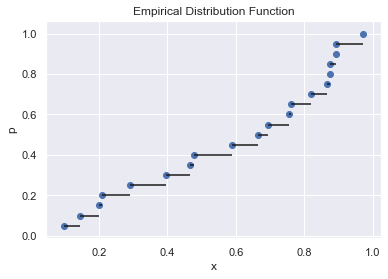

In [25]:
#hide-output
data = np.random.uniform(0, 1, 20)

x = np.sort(data)
n = x.size
y = np.arange(1, n+1) / n

fig, axes = plt.subplots()
axes.set_title("Empirical Distribution Function")
axes.scatter(x, y)
axes.set_xlabel("x")
axes.set_ylabel("p")
for i, j in enumerate(x[:-1]):

    axes.hlines(y[i], x[i], x[i+1])

fig.savefig("empirical_distribution_function.png")

## TODO

Incorporate formulars from these sources

- [link](https://static1.squarespace.com/static/54bf3241e4b0f0d81bf7ff36/t/55e9494fe4b011aed10e48e5/1441352015658/probability_cheatsheet.pdf)
- [link](https://www.uio.no/studier/emner/matnat/math/STK1100/v16/formelsamling-stk-1100-1110_eng_nov_2015.pdf)

## Sources

My main sources are

- {% cite murphy2012machine %}
- {% cite statistik %}



## References

{% bibliography --cited %}